In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


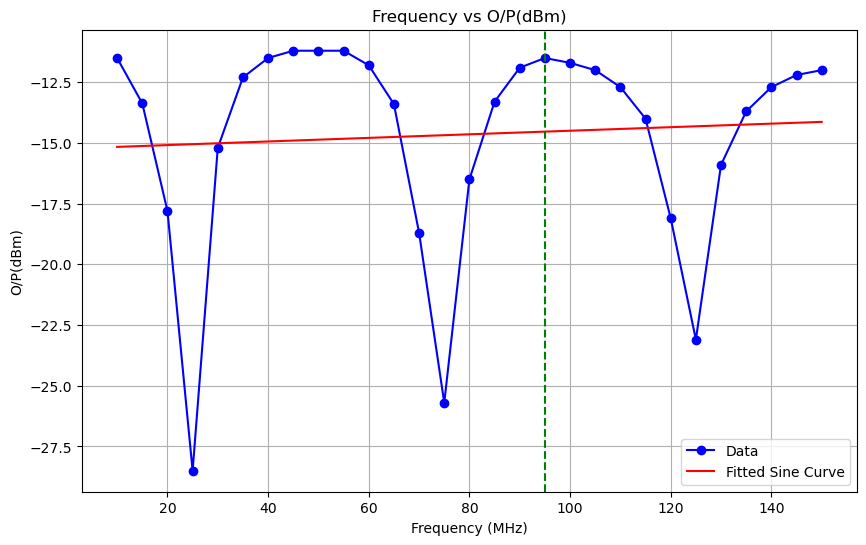

In [4]:

# Step 1: Read data from Excel file
# Replace 'data.xlsx' with your Excel file path
df = pd.read_excel('1 Radio Lab RF chain.xlsx',sheet_name = "cabel")

# Step 2: Extract Frequency and Voltage columns
frequency = df['Frequency(MHz)']
#voltage = df['V(mV)']
voltage = df['O/P(dBm)']

# Step 3: Define sine function to fit the data
def sine_func(x, A, f, phi, offset):
    return A * np.sin(2 * np.pi * f * x + phi) + offset

# Step 4: Fit the sine function to the data
popt, _ = curve_fit(sine_func, frequency, voltage, p0=[max(voltage)-min(voltage), 1, 0, np.mean(voltage)])

# Step 5: Create a plot of the data and the fitted sine curve
plt.figure(figsize=(10,6))
plt.plot(frequency, voltage, label='Data', marker='o', linestyle='-', color='b')
plt.plot(frequency, sine_func(frequency, *popt), label='Fitted Sine Curve', color='r')

# Step 6: Find the maxima points
maxima = []
for i in range(1, len(frequency)-1):
    if voltage[i-1] < voltage[i] > voltage[i+1]:
        maxima.append(frequency[i])

# Step 7: Mark the maxima with vertical lines
for max_point in maxima:
    plt.axvline(x=max_point, color='g', linestyle='--')

# Step 8: Label the plot
plt.title('Frequency vs O/P(dBm)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('O/P(dBm)')
plt.legend()
plt.grid(True)
plt.show()


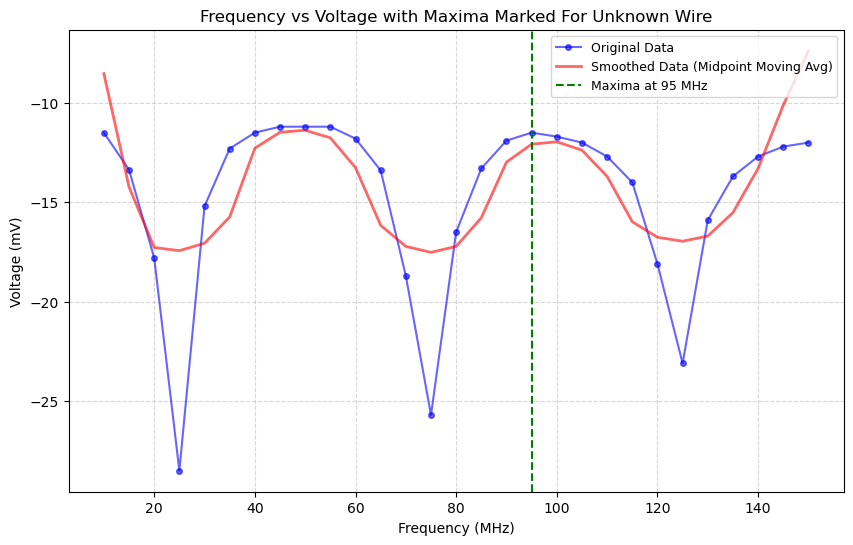

In [6]:

# Step 2: Extract Frequency and Voltage columns
frequency = df['Frequency(MHz)']
voltage = df['O/P(dBm)']

# Step 3: Apply midpoint moving average to smooth the data (e.g., window size = 5)
window_size = 5
smoothed_voltage = np.convolve(voltage, np.ones(window_size)/window_size, mode='same')

# Step 4: Find local maxima
maxima = []
for i in range(1, len(frequency)-1):
    if voltage[i-1] < voltage[i] > voltage[i+1]:  # Local maxima
        maxima.append(frequency[i])

# Step 5: Plot the data
plt.figure(figsize=(10,6))

# Original data
plt.plot(frequency, voltage, label='Original Data', marker='o', linestyle='-', color='b', markersize=4, alpha=0.6)

# Smoothed data
plt.plot(frequency, smoothed_voltage, label='Smoothed Data (Midpoint Moving Avg)', color='r', linewidth=2, alpha=0.6)

# Step 6: Mark the maxima with vertical lines
for max_point in maxima:
    plt.axvline(x=max_point, color='g', linestyle='--', label=f'Maxima at {max_point} MHz')

# Step 7: Label the plot
plt.title('Frequency vs Voltage with Maxima Marked For Unknown Wire')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Voltage (mV)')
plt.legend(loc='upper right', fontsize=9)
plt.grid(True, linestyle='--', alpha=0.5)
#plt.ylim(140,260)
# Step 8: Show the plot
plt.show()


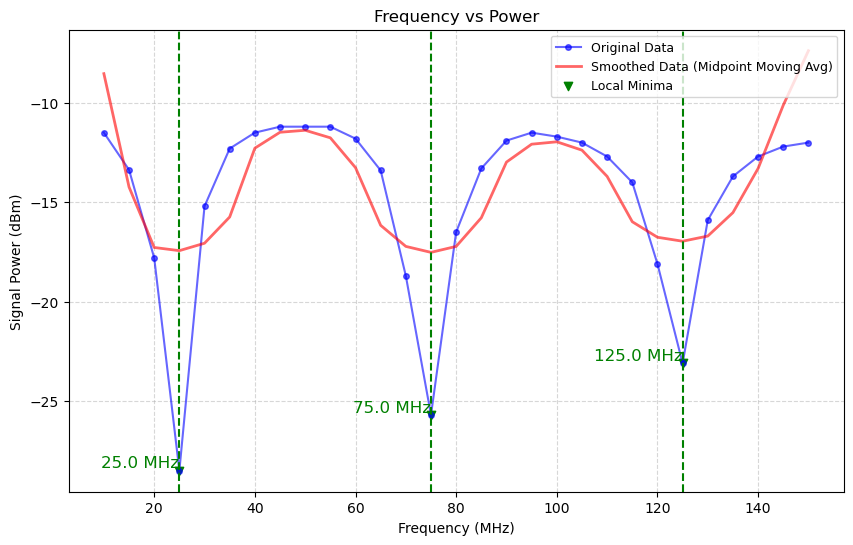

In [11]:


# Step 2: Extract Frequency and Voltage columns
frequency = df['Frequency(MHz)']
voltage = df['O/P(dBm)']

# Step 3: Apply midpoint moving average to smooth the data (e.g., window size = 5)
window_size = 5
smoothed_voltage = np.convolve(voltage, np.ones(window_size)/window_size, mode='same')

# Step 4: Find local minima
minima = []
minima_frequencies = []
for i in range(1, len(frequency)-1):
    if voltage[i-1] > voltage[i] < voltage[i+1]:  # Local minima condition
        minima.append(voltage[i])
        minima_frequencies.append(frequency[i])

# Step 5: Plot the data
plt.figure(figsize=(10,6))

# Original data
plt.plot(frequency, voltage, label='Original Data', marker='o', linestyle='-', color='b', markersize=4, alpha=0.6)

# Smoothed data
plt.plot(frequency, smoothed_voltage, label='Smoothed Data (Midpoint Moving Avg)', color='r', linewidth=2, alpha=0.6)

# Step 6: Mark the minima with vertical lines and labels
plt.scatter(minima_frequencies, minima, color='g', marker='v', label='Local Minima')

for i in range(len(minima_frequencies)):
    plt.axvline(x=minima_frequencies[i], color='g', linestyle='--')

    plt.text(minima_frequencies[i], minima[i], f'{minima_frequencies[i]:.1f} MHz', 
             fontsize=12, verticalalignment='bottom', horizontalalignment='right', color='green')

# Step 7: Label the plot
plt.title('Frequency vs Power')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Signal Power (dBm)')
plt.legend(loc='upper right', fontsize=9)
plt.grid(True, linestyle='--', alpha=0.5)

# Step 8: Show the plot
plt.show()
